In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('./data/pose.csv')
print(data.columns)

Index(['Unnamed: 0', 'left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_elbow_x', 'left_elbow_y', 'right_elbow_x',
       'right_elbow_y', 'left_wrist_x', 'left_wrist_y', 'right_wrist_x',
       'right_wrist_y'],
      dtype='object')


In [18]:
def length(x1,y1,x2,y2):
    x = np.sqrt((x1-x2)**2+(y1-y2)**2)
    print(x)
    return x

In [20]:
data['left_shoulder_elbow'] = length(data['left_shoulder_x'],data['left_shoulder_y'],data['left_elbow_x'],data['left_elbow_y'])
data['left_elbow_wrist'] = length(data['left_elbow_x'],data['left_elbow_y'],data['left_wrist_x'],data['left_wrist_y'])
data['left_wrist_shoulder'] = length(data['left_wrist_x'],data['left_wrist_y'],data['left_shoulder_x'],data['left_shoulder_y'])

0      0.219378
1      0.220363
2      0.216890
3      0.207752
4      0.207528
         ...   
352    0.166246
353    0.165879
354    0.165194
355    0.164445
356    0.163651
Length: 357, dtype: float64
0      0.127246
1      0.128534
2      0.129572
3      0.130035
4      0.131986
         ...   
352    0.093665
353    0.093322
354    0.093039
355    0.091736
356    0.091146
Length: 357, dtype: float64
0      0.168612
1      0.166295
2      0.166015
3      0.155397
4      0.154517
         ...   
352    0.137814
353    0.137075
354    0.135288
355    0.133386
356    0.131963
Length: 357, dtype: float64


In [22]:
import math
data['left_arm_angle'] = data.apply(lambda x: math.degrees(math.acos((x['left_shoulder_elbow']**2+x['left_elbow_wrist']**2-x['left_wrist_shoulder']**2)/(2*x['left_shoulder_elbow']*x['left_elbow_wrist']))), axis=1)
print(data['left_arm_angle'])


0      49.997982
1      48.647453
2      49.812441
3      48.329397
4      48.060772
         ...    
352    55.992368
353    55.726387
354    54.974559
355    54.160294
356    53.666766
Name: left_arm_angle, Length: 357, dtype: float64


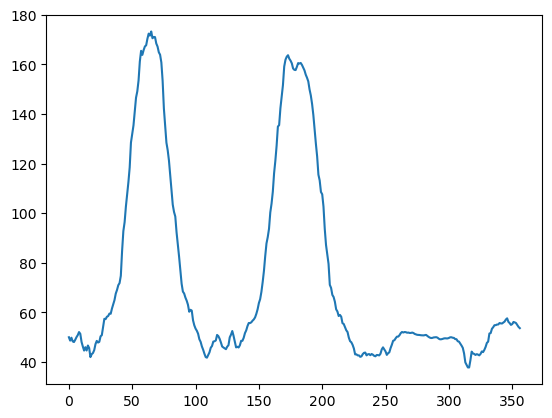

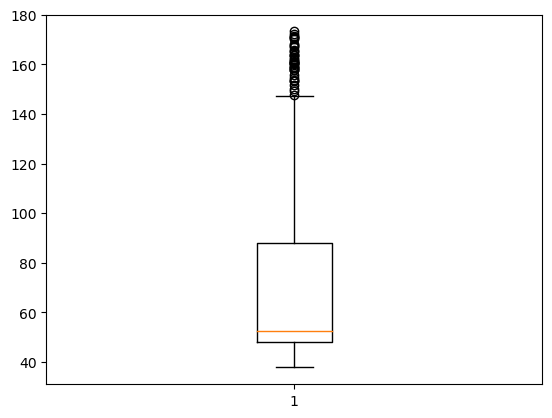

In [24]:
import matplotlib.pyplot as plt

plt.plot(data['left_arm_angle'])
plt.show()
plt.boxplot(data['left_arm_angle'])
plt.show()